<a href="https://colab.research.google.com/github/MercadoMR/AITraining/blob/main/FormacionIA_Clasificacion3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Vecinos mas cercanos

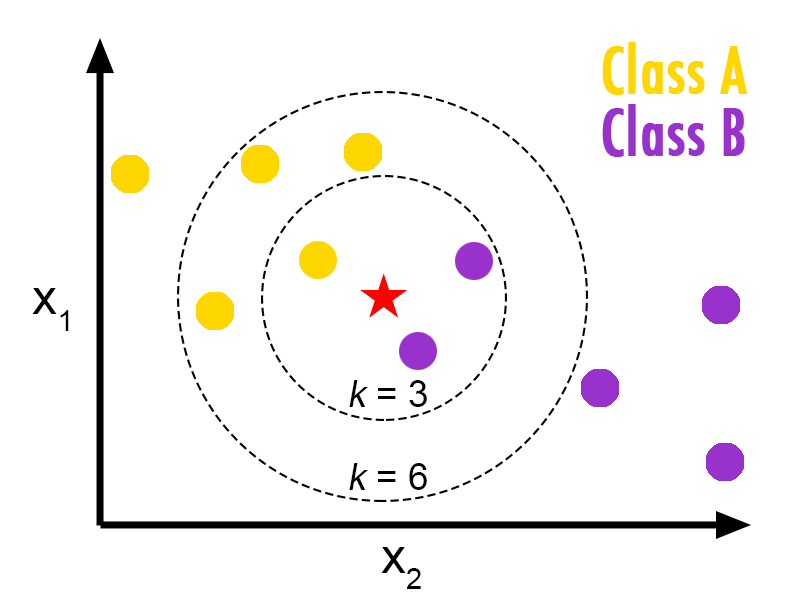

In [ ]:
# Descargamos los datos de Iris y los asignamos en un DataFrame
import pandas as pd
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()

df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])

print("El total de datos es", len(df))

El total de datos es 150


In [ ]:
# Vemos los primeros 5 elementos del DataFrame
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
# Dividimos el conjunto de nuestros datos en grupos
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[16  0  0]
 [ 0 22  1]
 [ 0  2 19]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.92      0.96      0.94        23
           2       0.95      0.90      0.93        21

    accuracy                           0.95        60
   macro avg       0.96      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60



In [ ]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

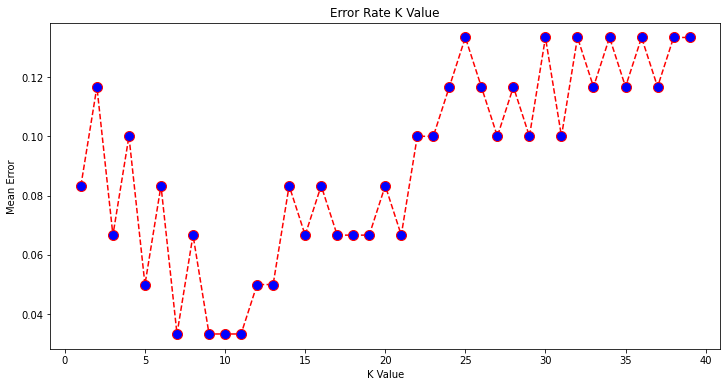

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color="red", linestyle="dashed", marker="o",
         markerfacecolor="blue", markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted wi

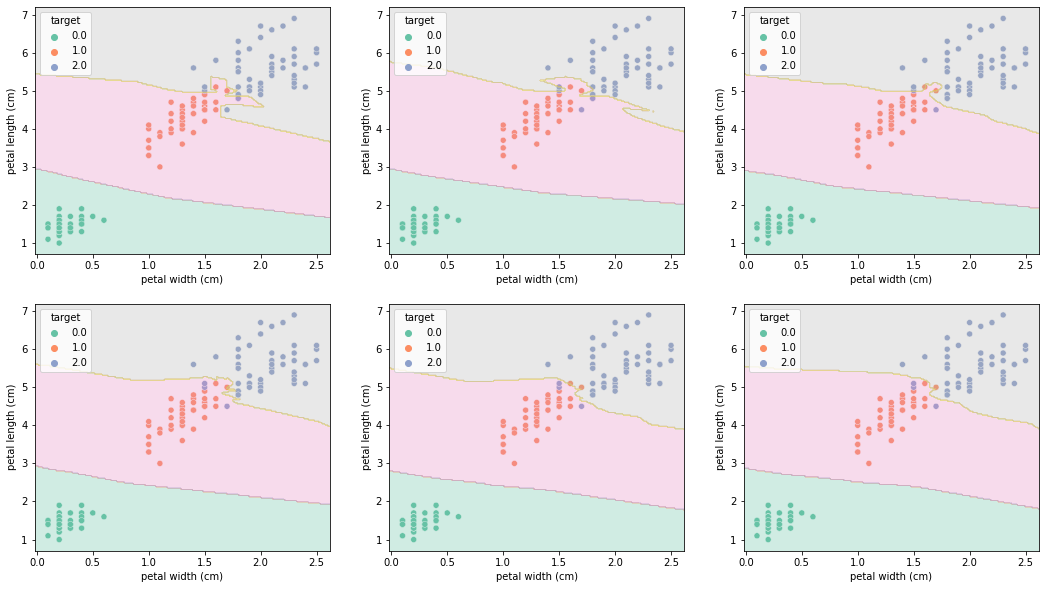

In [ ]:
# Visualizamos el árbol gráficamente:

# Librería gráfica sns (Ploteos especiales)
import seaborn as sns

# Nuestras entradas X, serán los datos de las flores (Le quitamos la columna de salidas al DataFrame)
# Nuestras salidas y, son las de la columna "Target" del DataFrame
X = df.drop("target", axis=1)
y = df["target"]

def Creador_Modelo(n):
  # Generamos el modelo del árbol para 2, 3, 4 y 5 niveles para visualizar sus divisiones
  clf = neighbors.KNeighborsClassifier(n)
  # Entrenamos los modelos
  clf.fit(X[['petal width (cm)', 'petal length (cm)']], y)
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
  contours = ax.contourf(xx, yy, Z, alpha=0.3, cmap = 'Set2')

# Graficamos los datos y las fronteras creadas
fig, axs = plt.subplots(2, 3)
fig.set_size_inches(18, 10)

# Proceso iterativo
for i in range(1, 7):
  plt.subplot(2, 3, i)
  ax = sns.scatterplot(X['petal width (cm)'], X['petal length (cm)'], hue=y, palette='Set2')
  xlim = ax.get_xlim()
  ylim = ax.get_ylim()
  xx, yy = np.meshgrid(np.linspace(*xlim, num=200), np.linspace(*ylim, num=200))
  # Graficamos todos los datos:
  Creador_Modelo(i)

plt.show()